In [ ]:
!pip install seaborn

In [2]:
import sys
print(sys.executable)

/Library/Frameworks/Python.framework/Versions/3.12/bin/python3


In [ ]:
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install aaanalysis
!{sys.executable} -m pip install "aaanalysis[pro]"

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import aaanalysis as aa
aa.options["verbose"] = False
aa.options["random_state"] = 42

In [367]:
# Load example dataset
# DOM_GSEC = domain gamma secretase set of interacting and non-interacting proteins and their sequences (22 residues)
    # n = 63 interacting + n = 63 non-interacting
    
df_seq = aa.load_dataset(name="DOM_GSEC") # here are all the 126 proteins, with entry = protein name uniprot_id, with sequence, and label

# here are the complete AA sequences of each protein
print(df_seq.head(10))
print(df_seq.iloc[0, 1]) # print P05067 


    entry                                           sequence  label  \
0  P05067  MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...      1   
1  P14925  MAGRARSGLLLLLLGLLALQSSCLAFRSPLSVFKRFKETTRSFSNE...      1   
2  P70180  MRSLLLFTFSACVLLARVLLAGGASSGAGDTRPGSRRRAREALAAQ...      1   
3  Q03157  MGPTSPAARGQGRRWRPPPLPLLLPLSLLLLRAQLAVGNLAVGSPS...      1   
4  Q06481  MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFA...      1   
5  P35613  MAAALFVLLGFALLGTHGASGAAGFVQAPLSQQRWVGGSVELHCEA...      1   
6  P35070  MDRAARCSGASSLPLLLALALGLVILHCVVADGNSTRSPETNGLLC...      1   
7  P09803  MGARCRSFSALLLLLQVSSWLCQELEPESCSPGFSSEVYTFPVPER...      1   
8  P19022  MCRIAGALRTLLPLLAALLQASVEASGEIALCKTGFPEDVYSAVLS...      1   
9  P16070  MDKFWWHAAWGLCLVPLSLAQIDLNITCRFAGVFHVEKNGRYSISR...      1   

   tmd_start  tmd_stop       jmd_n                      tmd       jmd_c  
0        701       723  FAEDVGSNKG  AIIGLMVGGVVIATVIVITLVML  KKKQYTSIHH  
1        868       890  KLSTEPGSGV  SVVLITTLLVIPVLVLLAIVMFI  RWKKSRAFG

In [53]:
# scales and what they mean: https://wwwmgs.bionet.nsc.ru/mgs/programs/crasp/texts/AAIndex_list.html

# labels are 1 - interacting, 0 - non-interacting, for every protein
labels = list(df_seq["label"])

# load AA scales (586 scales = columns) - just standardized values for each AA and its corresponding scales (characteric features like hydrophobicity,...)
df_scales = aa.load_scales()
df_scales.head(10)

,ANDN920101,ARGP820101,ARGP820102,ARGP820103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,BIOV880101,...,KOEH090103,KOEH090104,KOEH090105,KOEH090106,KOEH090107,KOEH090108,KOEH090109,KOEH090110,KOEH090111,KOEH090112
AA,,,,,,,,,,,,,,,,,,,,,
A,0.494,0.230,0.355,0.504,1.000,0.512,0.000,0.249,0.164,0.476,...,0.194,0.300,0.551,0.222,0.308,0.273,0.221,0.140,0.522,0.345
C,0.864,0.404,0.579,0.387,0.000,0.233,0.783,0.205,0.323,0.936,...,0.279,0.222,0.174,0.000,0.449,0.273,0.346,0.285,0.416,1.000
D,1.000,0.174,0.000,0.000,0.404,0.233,1.000,0.867,0.324,0.191,...,0.583,0.889,0.720,0.556,1.000,1.000,0.875,0.919,0.796,0.440
E,0.420,0.177,0.019,0.032,0.713,0.000,0.267,0.811,0.488,0.106,...,0.542,0.889,0.732,0.593,0.718,0.857,0.853,0.913,1.000,0.681
F,0.877,0.762,0.601,0.670,0.574,1.000,0.267,0.076,0.783,1.000,...,0.049,0.189,0.000,0.148,0.000,0.182,0.000,0.029,0.186,0.017
G,0.025,0.026,0.138,0.170,0.309,0.233,1.000,1.000,0.000,0.388,...,0.230,0.544,0.608,0.222,0.538,0.571,0.191,0.221,0.481,0.112
H,0.840,0.230,0.082,0.053,0.574,0.651,0.633,0.112,0.561,0.579,...,0.455,0.856,0.402,0.370,0.500,0.545,0.618,0.651,0.726,0.267
I,0.000,0.838,0.440,0.543,0.713,1.000,0.000,0.671,0.663,0.885,...,0.000,0.000,0.246,0.074,0.167,0.091,0.051,0.029,0.398,0.276
K,0.506,0.434,0.003,0.004,0.574,0.000,0.633,0.687,0.694,0.000,...,0.737,0.933,0.873,1.000,0.936,0.779,1.000,1.000,0.734,0.405


In [65]:
# AAclust - as many of the scales are redundant - ue AAclust to get only the 100 most important features
# less noisy - improves model performance, speeds up computation
# Feature Engineering 
# Obtain redundancy-reduced set of 100 scales
aac = aa.AAclust()

# transforms the df_scales pandas format into numpy array and transposes it to match input requirements
X = np.array(df_scales).T
scales = aac.fit(X, names=list(df_scales), n_clusters=100).medoid_names_

# get only the redundancy reduced scales - 100 scales = 100 columns
df_scales = df_scales[scales]
df_scales.head(10)

,ANDN920101,SIMZ760101,ARGP820102,QIAN880105,CORJ870107,BEGF750103,GUYH850101,BIGC670101,ROSG850102,BROC820101,...,VELV850101,VENT840101,AURR980104,VINM940102,KOEH090102,NADH010106,GEOR030106,KARS160120,LINS030116,LINS030117
AA,,,,,,,,,,,,,,,,,,,,,
A,0.494,0.268,0.355,1.000,0.446,0.000,0.551,0.164,0.564,0.565,...,0.295,0.0,0.149,0.658,0.174,0.330,0.516,0.952,0.091,0.186
C,0.864,0.258,0.579,0.424,0.725,0.783,0.174,0.323,1.000,0.000,...,0.657,0.0,0.070,0.051,0.115,1.000,0.000,0.952,0.034,0.000
D,1.000,0.206,0.000,0.514,0.000,1.000,0.720,0.324,0.256,0.216,...,1.000,0.0,1.000,0.949,1.000,0.453,0.404,0.952,0.523,0.186
E,0.420,0.210,0.019,0.833,0.233,0.267,0.732,0.488,0.256,0.072,...,0.046,0.0,0.456,0.969,0.802,0.291,0.610,0.952,0.830,0.349
F,0.877,0.887,0.601,0.569,0.950,0.267,0.000,0.783,0.923,0.973,...,0.749,1.0,0.263,0.311,0.068,0.673,0.712,0.952,0.193,0.326
G,0.025,0.032,0.138,0.021,0.352,1.000,0.608,0.000,0.513,0.274,...,0.040,0.0,0.491,1.000,0.328,0.171,0.210,0.952,0.000,0.023
H,0.840,0.387,0.082,0.431,0.610,0.633,0.402,0.561,0.667,0.243,...,0.191,0.0,0.333,0.474,0.650,0.162,0.612,0.562,0.443,0.419
I,0.000,0.990,0.440,0.472,0.969,0.000,0.246,0.663,0.923,0.541,...,0.000,1.0,0.193,0.281,0.000,0.569,0.457,0.583,0.080,0.140
K,0.506,0.516,0.003,0.549,0.027,0.633,0.873,0.694,0.000,0.188,...,0.294,0.0,0.070,0.923,0.809,0.199,0.536,0.912,1.000,1.000


In [364]:
# now you can use CPP algorithm
#Parts: Pick a subsection of a protein sequence (e.g., a transmembrane domain (TMD)). 
#Splits: Split the part to obtain positions of each AA in this part
#Scales: Physicochemical properties of amino acids assigned to each split (AA) (from AAclust).

sf = aa.SequenceFeature()

# Obtain Parts from tmd region = 20 to 25 AAs of each protein out of the 126 
df_parts1 = sf.get_df_parts(df_seq=df_seq, list_parts=["tmd"])


split_kws = sf.get_split_kws(n_split_max=1, split_types=["Segment"])


print(df_parts.info())
# df_parts has 126 proteins in it = substrates 63 and nonsubstrates 63 of gamma secretase
# it has only the three regions with their amino acids... jmd-n_tmd-n; tmd; tmd-c_jmd-c 
df_parts.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, P05067 to P0DPA2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tmd          126 non-null    object
 1   jmd_n_tmd_n  126 non-null    object
 2   tmd_c_jmd_c  126 non-null    object
dtypes: object(3)
memory usage: 8.0+ KB
None


,tmd,jmd_n_tmd_n,tmd_c_jmd_c
entry,,,
P05067,AIIGLMVGGVVIATVIVITLVML,FAEDVGSNKGAIIGLMVGGVVI,ATVIVITLVMLKKKQYTSIHH
P14925,SVVLITTLLVIPVLVLLAIVMFI,KLSTEPGSGVSVVLITTLLVIP,VLVLLAIVMFIRWKKSRAFGD
P70180,SAVTGIVVGALLGAGLLMAFYFF,PCKSSGGLEESAVTGIVVGALL,GAGLLMAFYFFRKKYRITIER
Q03157,ALSGLLIMGAGGGSLIVLSLLLL,APSGTGVSREALSGLLIMGAGG,GSLIVLSLLLLRKKKPYGTIS
Q06481,ALIGLLVIAVAIATVIVISLVML,LREDFSLSSSALIGLLVIAVAI,ATVIVISLVMLRKRQYGTISH
P35613,AALWPFLGIVAEVLVLVTIIFIY,IITLRVRSHLAALWPFLGIVAE,VLVLVTIIFIYEKRRKPEDVL
P35070,ILVICLIAVMVVFIILVIGVCTC,LFYLRGDRGQILVICLIAVMVV,FIILVIGVCTCCHPLRKRRKR
P09803,AILGILGGILALLILILLLLLFL,GIVAAGLQVPAILGILGGILAL,LILILLLLLFLRRRTVVKEPL
P19022,AIIAILLCIIILLILVLMFVVWM,RIVGAGLGTGAIIAILLCIIIL,LILVLMFVVWMKRRDKERQAK


In [106]:
# Create 100 baseline features (Scale values averaged over TMD)
cpp1 = aa.CPP(df_scales=df_scales, df_parts=df_parts1, split_kws=split_kws)
df_feat_baseline1 = cpp1.run(labels=labels, max_cor=1)
aa.display_df(df=df_feat_baseline1, n_rows=10)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions
1,"TMD-Segment(1,1)-WOLR790101",Polarity,Hydrophobicity (surrounding),Hydration potential,"Hydrophobicity ...n et al., 1979)",0.257000,0.037000,0.037000,0.028000,0.042000,0.000001,0.000065,"11,12,13,14,15,...,26,27,28,29,30"
2,"TMD-Segment(1,1)-FUKS010106",Composition,Membrane proteins (MPs),Proteins of mesophiles (INT),"Interior compos...ishikawa, 2001)",0.240000,0.068000,0.068000,0.065000,0.082000,0.000003,0.000162,"11,12,13,14,15,...,26,27,28,29,30"
3,"TMD-Segment(1,1)-BEGF750103",Conformation,β-turn,β-turn,"Conformational ...in-Dirkx, 1975)",0.237000,0.064000,-0.064000,0.067000,0.087000,0.000004,0.000149,"11,12,13,14,15,...,26,27,28,29,30"
4,"TMD-Segment(1,1)-FASG760105",Polarity,Unclassified (Polarity),pK-C,"pK-C (Fasman, 1976)",0.234000,0.044000,0.044000,0.038000,0.057000,0.000006,0.000144,"11,12,13,14,15,...,26,27,28,29,30"
5,"TMD-Segment(1,1)-YUTK870104",Energy,Free energy (unfolding),Free energy (unfolding),"Activation Gibb...i et al., 1987)",0.234000,0.011000,0.011000,0.010000,0.020000,0.000006,0.000122,"11,12,13,14,15,...,26,27,28,29,30"
6,"TMD-Segment(1,1)-LINS030116",ASA/Volume,Accessible surface area (ASA),ASA (folded β-strand),"Total median ac...s et al., 2003)",0.230000,0.028000,-0.028000,0.021000,0.039000,0.000008,0.000119,"11,12,13,14,15,...,26,27,28,29,30"
7,"TMD-Segment(1,1)-ANDN920101",Structure-Activity,Backbone-dynamics (-CH),α-CH chemical s...kbone-dynamics),"alpha-CH chemic...n et al., 1992)",0.229000,0.068000,-0.068000,0.073000,0.081000,0.000009,0.000103,"11,12,13,14,15,...,26,27,28,29,30"
8,"TMD-Segment(1,1)-ROBB760109",Conformation,β-turn (N-term),β-turn (1st residue),"Information mea...n-Suzuki, 1976)",0.229000,0.039000,-0.039000,0.041000,0.047000,0.000009,0.000116,"11,12,13,14,15,...,26,27,28,29,30"
9,"TMD-Segment(1,1)-FAUJ880109",Energy,Isoelectric point,Number hydrogen bond donors,"Number of hydro...e et al., 1988)",0.229000,0.024000,-0.024000,0.020000,0.032000,0.000008,0.000127,"11,12,13,14,15,...,26,27,28,29,30"
10,"TMD-Segment(1,1)-CHAM830108",Energy,Charge,Charge (donor),"A parameter of ...-Charton, 1983)",0.223000,0.082000,-0.082000,0.090000,0.102000,0.000014,0.000139,"11,12,13,14,15,...,26,27,28,29,30"


In [107]:
# CPP creates around 100.000 features and filters them down to 100
df_parts = sf.get_df_parts(df_seq=df_seq)
cpp = aa.CPP(df_scales=df_scales, df_parts=df_parts)
df_feat = cpp.run(labels=labels)
aa.display_df(df=df_feat, n_rows=8)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions
1,"TMD_C_JMD_C-Seg...2,3)-QIAN880106",Conformation,α-helix,α-helix (middle),"Weights for alp...ejnowski, 1988)",0.387000,0.118000,0.118000,0.068000,0.080000,0.000000,0.000000,"27,28,29,30,31,32,33"
2,"TMD_C_JMD_C-Pat...,12)-ROBB760109",Conformation,β-turn (N-term),β-turn (1st residue),"Information mea...n-Suzuki, 1976)",0.363000,0.119000,-0.119000,0.065000,0.085000,0.000000,0.000000,"21,25,28,32"
3,"TMD_C_JMD_C-Seg...6,9)-ZIMJ680104",Energy,Isoelectric point,Isoelectric point,"Isoelectric poi...n et al., 1968)",0.352000,0.268000,0.268000,0.174000,0.173000,0.000000,0.000000,"32,33"
4,"TMD_C_JMD_C-Seg...4,9)-ROBB760113",Conformation,β-turn,β-turn,"Information mea...n-Suzuki, 1976)",0.349000,0.337000,-0.337000,0.177000,0.254000,0.000000,0.000000,"27,28"
5,"TMD_C_JMD_C-Seg...4,5)-ZIMJ680104",Energy,Isoelectric point,Isoelectric point,"Isoelectric poi...n et al., 1968)",0.336000,0.205000,0.205000,0.134000,0.157000,0.000000,0.000000,"33,34,35,36"
6,"TMD_C_JMD_C-Pat...,15)-QIAN880106",Conformation,α-helix,α-helix (middle),"Weights for alp...ejnowski, 1988)",0.336000,0.152000,0.152000,0.102000,0.132000,0.000000,0.000000,"28,32,35"
7,"TMD_C_JMD_C-Seg...6,9)-LINS030101",ASA/Volume,Volume,Accessible surface area (ASA),"Total accessibl...s et al., 2003)",0.328000,0.235000,0.235000,0.156000,0.187000,0.000000,0.000000,"32,33"
8,"TMD_C_JMD_C-Seg...2,3)-ZIMJ680104",Energy,Isoelectric point,Isoelectric point,"Isoelectric poi...n et al., 1968)",0.326000,0.108000,0.108000,0.077000,0.085000,0.000000,0.000000,"27,28,29,30,31,32,33"


In [109]:
# A feature matrix for a given set of CPP features can be created using the SequenceFeature.feature_matrix() method. 
# The feature matrix will be used to train a Random Forest Classifier model:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create feature matrix and perform prediction for baseline features
X1 = sf.feature_matrix(df_parts=df_parts, features=df_feat_baseline1["feature"])
rf1 = RandomForestClassifier()
cv_base1 = cross_val_score(rf1, X1, labels, scoring="accuracy", cv=5)
print(f"Mean accuracy of {round(np.mean(cv_base1), 2)}")

Mean accuracy of 0.62


In [115]:
# here are the 5 accuracy scores from each cross validation
cv_base1

array([0.53846154, 0.68      , 0.56      , 0.64      , 0.68      ])

In [116]:
# Create feature matrix and perform prediction for default CPP features
X = sf.feature_matrix(df_parts=df_parts, features=df_feat["feature"])
rf = RandomForestClassifier()
cv = cross_val_score(rf, X, labels, scoring="accuracy", cv=5)
print(f"Mean accuracy of {round(np.mean(cv), 2)}")

Mean accuracy of 0.86


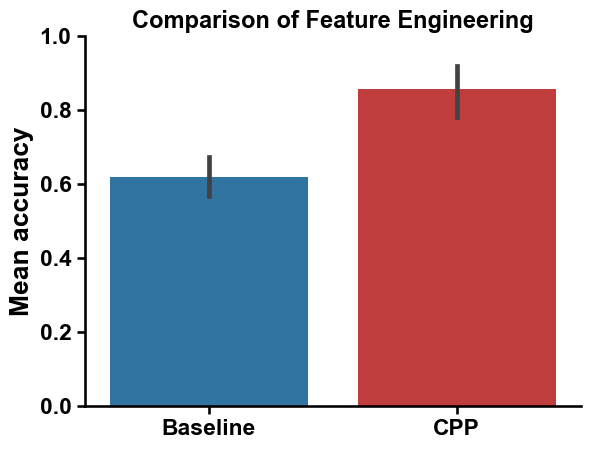

In [112]:
# Comparison of baseline and default CPP feature sets
aa.plot_settings()
sns.barplot(pd.DataFrame({"Baseline": cv_base1, "CPP": cv}), palette=["tab:blue", "tab:red"])
plt.ylabel("Mean accuracy", size=aa.plot_gcfs()+1)
plt.ylim(0, 1)
plt.title("Comparison of Feature Engineering", size=aa.plot_gcfs()-1)
sns.despine()
plt.show()

In [120]:
# Include group level feature importance
# TreeModel is likely a Random forest ML to rank features by their importance in classification
tm = aa.TreeModel()
tm.fit(X, labels=labels)
df_feat = tm.add_feat_importance(df_feat=df_feat, drop=True) # this adds a new column containing importance scores

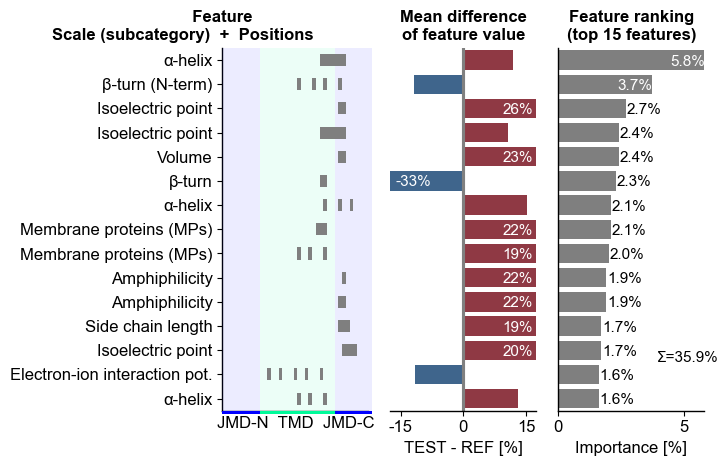

In [142]:
# Plot CPP ranking
cpp_plot = aa.CPPPlot()
aa.plot_settings(short_ticks=True, weight_bold=False)
cpp_plot.ranking(df_feat=df_feat, n_top=15)   # standard here is the 15 most important features

plt.show() 

In [266]:

# This will return a pandas Series or DataFrame with the CFI values
cfi_profile = cpp_profile(df_feat=df_feat, **args_seq)

# Now you can use it as a list, NumPy array, or DataFrame column
print(cfi_profile)


NameError: name 'cpp_profile' is not defined

In [264]:
dir(aa.CPPPlot) # to find out what available methods of the function are there
help(aa.CPPPlot.eval) # to get help on specific method

Help on function eval in module aaanalysis.feature_engineering._cpp_plot:

eval(df_eval: pandas.core.frame.DataFrame = None, figsize: Tuple[int, int] = (6, 4), dict_xlims: Optional[dict] = None, legend: bool = True, legend_y: float = -0.3, dict_color: Optional[dict] = None, list_cat: Optional[List[str]] = None) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes]
    Plot evaluation output of CPP comparing multiple sets of identified feature sets.

    Evaluation measures are categorized into two groups:

    * **Discriminative Power** measures ('range_ABS_AUC' and 'avg_MEAN_DIF'), which
      assess the effectiveness of the feature set in distinguishing between the test and reference datasets.
    * **Redundancy** measures ('n_clusters', 'avg_n_feat_per_clust', and 'std_n_feat_per_clust'), which
      evaluate the internal redundancy of a feature set using Pearson correlation-based clustering.

    Parameters
    ----------
    df_eval : pd.DataFrame, shape (n_feature_sets, 

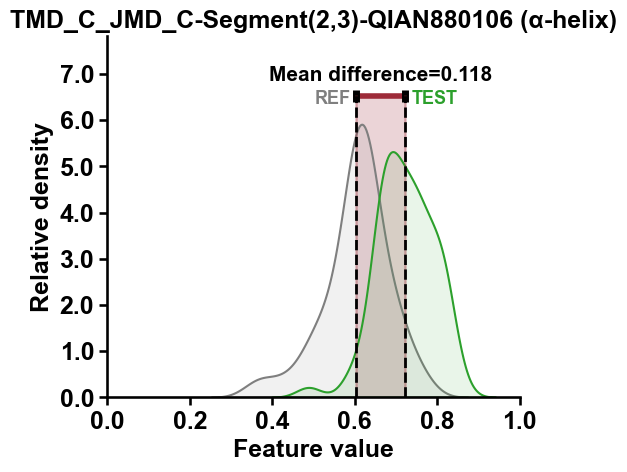

In [172]:
top_feature = df_feat["feature"][0]
top_subcategory = df_feat["subcategory"][0]
aa.plot_settings()
cpp_plot.feature(feature=top_feature , df_seq=df_seq, labels=labels)
plt.title(f"{top_feature} ({top_subcategory})")
plt.show()

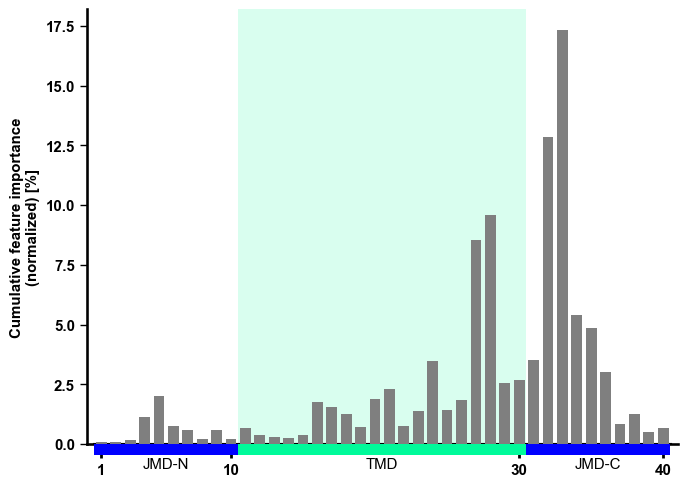

In [173]:
# Plot CPP profile - for all proteins analysed not APP alone
# all the values are stored in cpp_plot
aa.plot_settings(font_scale=0.6)
cpp_plot.profile(df_feat=df_feat)
plt.show()

# Now trying to extract the importance data for APP

In [388]:
df_pos = sf.get_df_pos(df_feat=df_feat, col_val="abs_auc", col_cat="category", normalize=True)
df_pos 

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
ASA/Volume,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.688316,0.743212,0.756556,0.747435,0.774461,0.774461,0.770238,0.718298,0.770238,0.770238
Composition,0.000000,0.000000,0.567544,0.608083,0.614417,0.567544,0.000000,0.000000,0.586547,0.000000,...,0.562477,0.716186,0.666357,0.613150,0.695495,0.663824,0.580212,0.562477,0.000000,0.580212
Conformation,0.000000,0.000000,0.000000,0.000000,0.557409,0.557409,0.000000,0.000000,0.000000,0.000000,...,0.686627,0.723999,0.694952,0.646088,0.690246,0.691061,0.595414,0.595414,0.601749,0.595414
Energy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.752503,0.788819,0.717393,0.670791,0.668047,0.699295,0.000000,0.679026,0.000000,0.000000
Polarity,0.603015,0.603015,0.603015,0.618218,0.603015,0.603015,0.618218,0.603015,0.603015,0.603015,...,0.710697,0.708163,0.702336,0.713230,0.713230,0.713230,0.659601,0.710697,0.710697,0.659601
Shape,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.651155,0.700562,0.717031,0.700562,0.651155,0.000000,0.000000,0.000000,0.000000,0.000000
Structure-Activity,0.000000,0.000000,0.000000,0.000000,0.000000,0.562477,0.554876,0.554876,0.562477,0.554876,...,0.638487,0.625819,0.605549,0.597948,0.573878,0.597948,0.613150,0.549808,0.000000,0.000000


In [398]:
df_ave = df_pos.sum(axis=0)
df_ave.head(10)

1     0.603015
2     0.603015
3     1.170559
4     1.226300
5     1.774842
6     2.290445
7     1.173093
8     1.157891
9     1.752039
10    1.157891
dtype: float64

In [406]:
df_ave.sum()

100.0

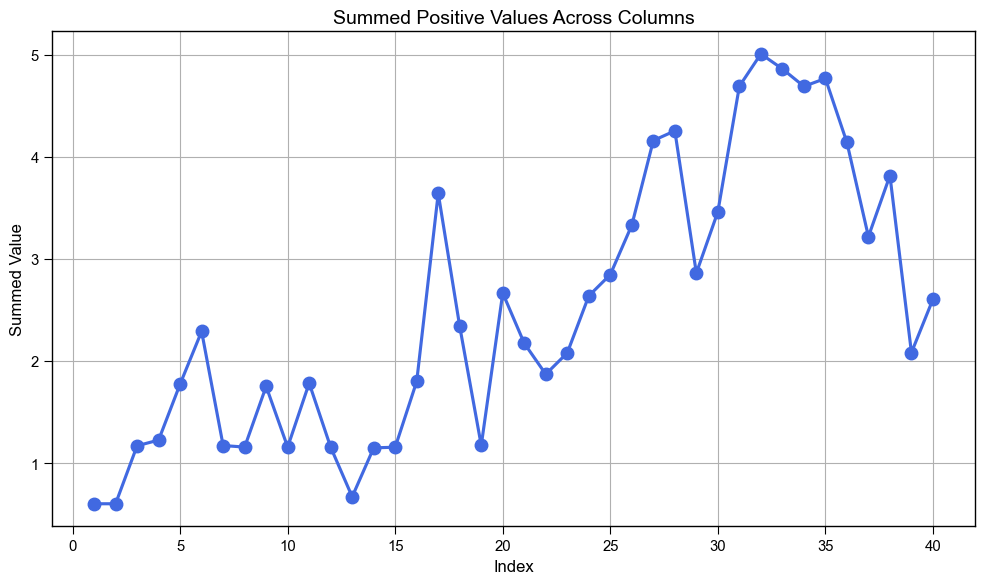

In [400]:
# x and y for plotting
x = df_ave.index
y = df_ave.values  # <-- no parentheses here

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='royalblue')
plt.title("Summed Positive Values Across Columns", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Summed Value", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [402]:
help(sf.get_df_pos)

Help on function get_df_pos in module aaanalysis.feature_engineering._sequence_feature:

get_df_pos(df_feat: pandas.core.frame.DataFrame = None, col_val: str = 'mean_dif', col_cat: str = 'category', start: int = 1, tmd_len: int = 20, jmd_n_len: int = 10, jmd_c_len: int = 10, list_parts: Union[List[str], str, NoneType] = None, normalize: bool = False) -> pandas.core.frame.DataFrame
    Create DataFrame of aggregated (mean or sum) feature values per residue position and scale.

    Parameters
    ----------
    df_feat : pd.DataFrame, shape (n_features, n_feature_info)
        Feature DataFrame with a unique identifier, scale information, statistics, and positions for each feature.
    col_val : {'abs_auc', 'abs_mean_dif', 'mean_dif', 'std_test', 'std_ref'}, default='mean_dif'
        Column name in ``df_feat`` containing numerical values to ``average``. If feature importance and impact
        are provided as {'feat_importance', 'feat_impact'} columns, their ``sum`` of values is compute

In [390]:
df_sum = df_pos.sum()
print(df_sum)

df_sum_sum = df_sum.sum()

df_sum_100 = df_sum / df_sum_sum
df_sum_100.head(100

1     0.603015
2     0.603015
3     1.170559
4     1.226300
5     1.774842
6     2.290445
7     1.173093
8     1.157891
9     1.752039
10    1.157891
11    1.783710
12    1.156624
13    0.671425
14    1.150290
15    1.156624
16    1.801023
17    3.642163
18    2.338585
19    1.174360
20    2.665430
21    2.173896
22    1.871122
23    2.080150
24    2.637982
25    2.846588
26    3.330520
27    4.158611
28    4.253793
29    2.861368
30    3.461427
31    4.690261
32    5.006760
33    4.860174
34    4.689205
35    4.766513
36    4.139819
37    3.218616
38    3.815720
39    2.082684
40    2.605466
dtype: float64


1     0.006030
2     0.006030
3     0.011706
4     0.012263
5     0.017748
6     0.022904
7     0.011731
8     0.011579
9     0.017520
10    0.011579
11    0.017837
12    0.011566
13    0.006714
14    0.011503
15    0.011566
16    0.018010
17    0.036422
18    0.023386
19    0.011744
20    0.026654
21    0.021739
22    0.018711
23    0.020802
24    0.026380
25    0.028466
26    0.033305
27    0.041586
28    0.042538
29    0.028614
30    0.034614
31    0.046903
32    0.050068
33    0.048602
34    0.046892
35    0.047665
36    0.041398
37    0.032186
38    0.038157
39    0.020827
40    0.026055
dtype: float64

In [193]:
# Filter the dataset to include only the APP protein
df_seq_APP = df_seq[df_seq['entry'] == 'P05067']
df_seq_APP

,entry,sequence,label,tmd_start,tmd_stop,jmd_n,tmd,jmd_c
0,P05067,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,1,701,723,FAEDVGSNKG,AIIGLMVGGVVIATVIVITLVML,KKKQYTSIHH


In [331]:
# Get sequences parts for APP
_df_parts = sf.get_df_parts(df_seq=df_seq, list_parts=["tmd", "jmd_c", "jmd_n"])
_args_seq = _df_parts.loc["P05067"].to_dict()
args_seq = {key + "_seq": _args_seq[key] for key in _args_seq}

In [338]:
fig, ax = cpp_plot.profile(df_feat=df_feat, add_xticks_pos = True, **args_seq)
print(ax.patches)

# Extract bar heights (i.e., the y-axis values) from the plot
bar_heights = [bar.get_height() for bar in ax.patches]

print(bar_heights)

<Axes.ArtistList of 44 patches>
[0.069, 0.164, 0.069, 0.481, 1.301, 1.8929999999999998, 0.59, 0.43400000000000005, 0.178, 0.178, 1.233, 0.267, 0.0, 0.644, 0.0, 0.267, 1.5780000000000003, 0.933, 1.901, 0.752, 0.0, 0.701, 3.8520000000000003, 0.058, 0.7589999999999999, 3.259, 2.8930000000000002, 0.122, 1.862, 13.284, 5.287, 2.69, 2.42, 9.946, 13.391, 13.657, 5.857000000000001, 3.5519999999999996, 0.29100000000000004, 0.809, 1.243, 0.497, 0.654, 14.33985]


In [341]:
# Get bar heights and round to 3 decimal places
bar_heights = [round(bar.get_height(), 3) for bar in ax.patches][:-1]  # <-- exclude last bar

# Normalize the values using min-max normalization
min_val = min(bar_heights)
max_val = max(bar_heights)

normalized_importances = [(val - min_val) / (max_val - min_val) for val in bar_heights]

# Get amino acid sequence and split into list
AA_letter = df_seq_APP['jmd_n'] + df_seq_APP['tmd'] + df_seq_APP['jmd_c']
AA_list = list(AA_letter.iloc[0])  # Unpack the string

# Generate positions starting from 690
aa_positions = list(range(691, 691 + len(AA_list)))

# Create DataFrame
df_plot = pd.DataFrame({
    "AA_letter": AA_list,
    "AA_position": aa_positions,
    "percent_importances": bar_heights[:len(AA_list)],
    "normalized_importances": normalized_importances[:len(AA_list)]
})


# write it into a .csv file
import os
file_path = "AA_bar_heights.csv"

if not os.path.exists(file_path):
    df_plot.to_csv(file_path, index=False)
    print(f"Datei gespeichert: {file_path}")
else:
    print(f"Datei existiert bereits: {file_path} – kein Überschreiben.")

[0.069, 0.164, 0.069, 0.481, 1.301, 1.893, 0.59, 0.434, 0.178, 0.178, 1.233, 0.267, 0.0, 0.644, 0.0, 0.267, 1.578, 0.933, 1.901, 0.752, 0.0, 0.701, 3.852, 0.058, 0.759, 3.259, 2.893, 0.122, 1.862, 13.284, 5.287, 2.69, 2.42, 9.946, 13.391, 13.657, 5.857, 3.552, 0.291, 0.809, 1.243, 0.497, 0.654]
Datei existiert bereits: AA_bar_heights.csv – kein Überschreiben.


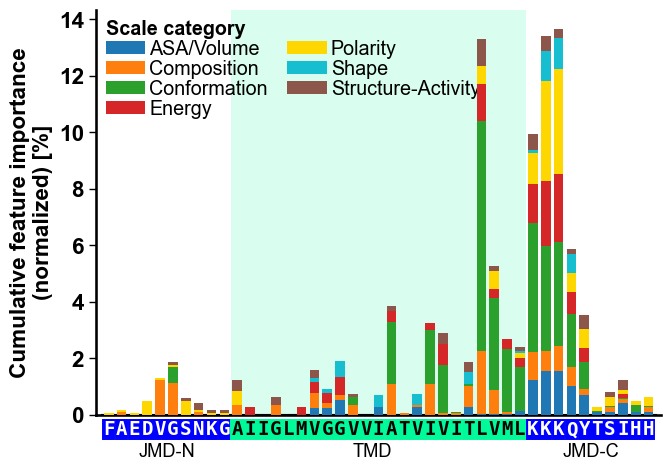

In [337]:
# Plot CPP profile ("sample level")
aa.plot_settings(font_scale=0.9)
cpp_plot.profile(df_feat=df_feat, add_legend_cat=True, **args_seq)
plt.show()

# Important this part

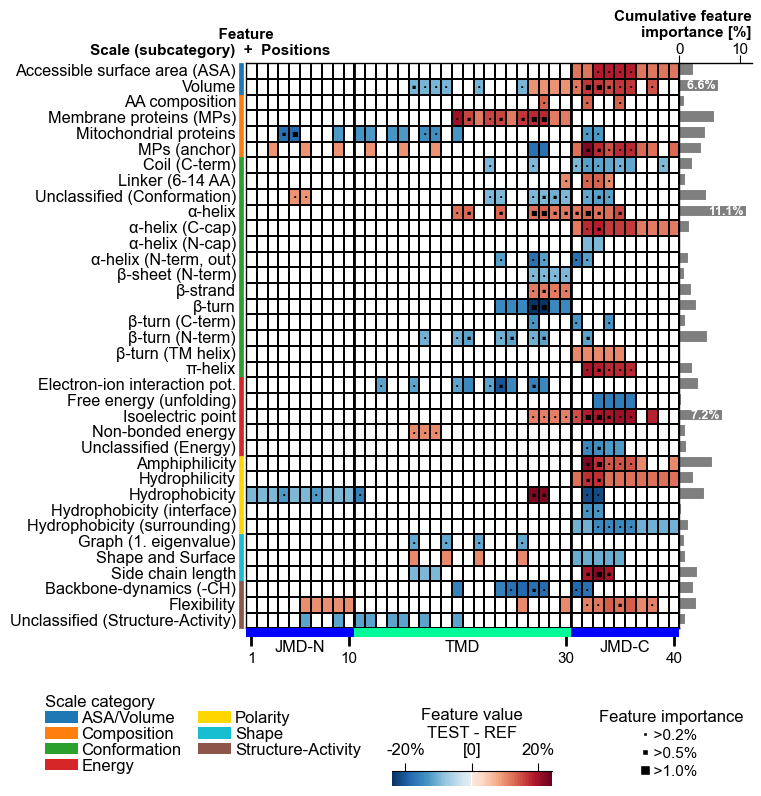

In [157]:
# Plot CPP feature map
cpp_plot = aa.CPPPlot()
aa.plot_settings(font_scale=0.65, weight_bold=False)
cpp_plot.feature_map(df_feat=df_feat)
plt.show()

In [372]:
# We can analyse the impact of features on the prediction score for individual sequence using the ShapExplainer model, which 
# combines CPP with the explainable AI framework SHAP.

# Obtain sample-specific feature impact
sm = aa.ShapModel()
sm.fit(X, labels=labels)
df_feat = sm.add_feat_impact(df_feat=df_feat)
df_feat = sm.add_sample_mean_dif(X, labels=labels, df_feat=df_feat, drop=True)

ValueError: Some 'feat_impact' columns exist already in 'df_feat'. To override, set 'drop=True'.
 These columns comprise: ['feat_impact_Protein0', 'feat_impact_Protein1', 'feat_impact_Protein2', 'feat_impact_Protein3', 'feat_impact_Protein4', 'feat_impact_Protein5', 'feat_impact_Protein6', 'feat_impact_Protein7', 'feat_impact_Protein8', 'feat_impact_Protein9', 'feat_impact_Protein10', 'feat_impact_Protein11', 'feat_impact_Protein12', 'feat_impact_Protein13', 'feat_impact_Protein14', 'feat_impact_Protein15', 'feat_impact_Protein16', 'feat_impact_Protein17', 'feat_impact_Protein18', 'feat_impact_Protein19', 'feat_impact_Protein20', 'feat_impact_Protein21', 'feat_impact_Protein22', 'feat_impact_Protein23', 'feat_impact_Protein24', 'feat_impact_Protein25', 'feat_impact_Protein26', 'feat_impact_Protein27', 'feat_impact_Protein28', 'feat_impact_Protein29', 'feat_impact_Protein30', 'feat_impact_Protein31', 'feat_impact_Protein32', 'feat_impact_Protein33', 'feat_impact_Protein34', 'feat_impact_Protein35', 'feat_impact_Protein36', 'feat_impact_Protein37', 'feat_impact_Protein38', 'feat_impact_Protein39', 'feat_impact_Protein40', 'feat_impact_Protein41', 'feat_impact_Protein42', 'feat_impact_Protein43', 'feat_impact_Protein44', 'feat_impact_Protein45', 'feat_impact_Protein46', 'feat_impact_Protein47', 'feat_impact_Protein48', 'feat_impact_Protein49', 'feat_impact_Protein50', 'feat_impact_Protein51', 'feat_impact_Protein52', 'feat_impact_Protein53', 'feat_impact_Protein54', 'feat_impact_Protein55', 'feat_impact_Protein56', 'feat_impact_Protein57', 'feat_impact_Protein58', 'feat_impact_Protein59', 'feat_impact_Protein60', 'feat_impact_Protein61', 'feat_impact_Protein62', 'feat_impact_Protein63', 'feat_impact_Protein64', 'feat_impact_Protein65', 'feat_impact_Protein66', 'feat_impact_Protein67', 'feat_impact_Protein68', 'feat_impact_Protein69', 'feat_impact_Protein70', 'feat_impact_Protein71', 'feat_impact_Protein72', 'feat_impact_Protein73', 'feat_impact_Protein74', 'feat_impact_Protein75', 'feat_impact_Protein76', 'feat_impact_Protein77', 'feat_impact_Protein78', 'feat_impact_Protein79', 'feat_impact_Protein80', 'feat_impact_Protein81', 'feat_impact_Protein82', 'feat_impact_Protein83', 'feat_impact_Protein84', 'feat_impact_Protein85', 'feat_impact_Protein86', 'feat_impact_Protein87', 'feat_impact_Protein88', 'feat_impact_Protein89', 'feat_impact_Protein90', 'feat_impact_Protein91', 'feat_impact_Protein92', 'feat_impact_Protein93', 'feat_impact_Protein94', 'feat_impact_Protein95', 'feat_impact_Protein96', 'feat_impact_Protein97', 'feat_impact_Protein98', 'feat_impact_Protein99', 'feat_impact_Protein100', 'feat_impact_Protein101', 'feat_impact_Protein102', 'feat_impact_Protein103', 'feat_impact_Protein104', 'feat_impact_Protein105', 'feat_impact_Protein106', 'feat_impact_Protein107', 'feat_impact_Protein108', 'feat_impact_Protein109', 'feat_impact_Protein110', 'feat_impact_Protein111', 'feat_impact_Protein112', 'feat_impact_Protein113', 'feat_impact_Protein114', 'feat_impact_Protein115', 'feat_impact_Protein116', 'feat_impact_Protein117', 'feat_impact_Protein118', 'feat_impact_Protein119', 'feat_impact_Protein120', 'feat_impact_Protein121', 'feat_impact_Protein122', 'feat_impact_Protein123', 'feat_impact_Protein124', 'feat_impact_Protein125']

### We can now show the feature ranking for a selected protein (‘Protein0’) 
# CPP-SHAP ranking plot
aa.plot_settings(short_ticks=True, weight_bold=False)
cpp_plot.ranking(df_feat=df_feat, shap_plot=True, col_dif="mean_dif_Protein0", col_imp="feat_impact_Protein0")
plt.show()

In [160]:
# Get sequences parts for APP
_df_parts = sf.get_df_parts(df_seq=df_seq, list_parts=["tmd", "jmd_c", "jmd_n"])
_args_seq = _df_parts.loc["P05067"].to_dict()
args_seq = {key + "_seq": _args_seq[key] for key in _args_seq}

In [ ]:
cpp_plot.profile(df_feat=df_feat, shap_plot=True, col_imp="feat_impact_Protein0", **args_seq)  # your plotting line

# Then check if this exists
df_profile = cpp_plot._df_profile  # Not officially documented, but may exist
print(df_profile.head())

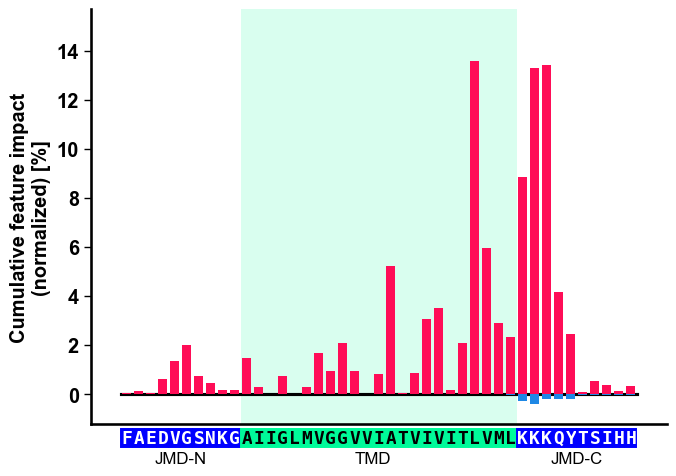

In [224]:
# CPP-SHAP profile
aa.plot_settings(font_scale=0.8)
cpp_plot.profile(df_feat=df_feat, shap_plot=True, col_imp="feat_impact_Protein0", **args_seq)
plt.show()

In [ ]:
print(df_feat)

In [237]:
cpp_plot.col_imp()

AttributeError: 'CPPPlot' object has no attribute 'col_imp'

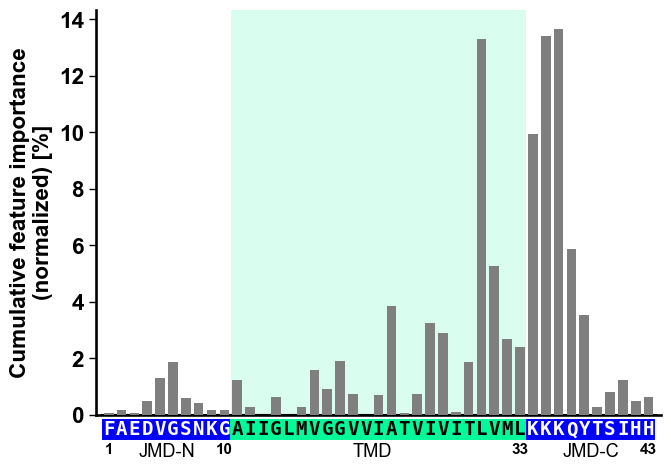

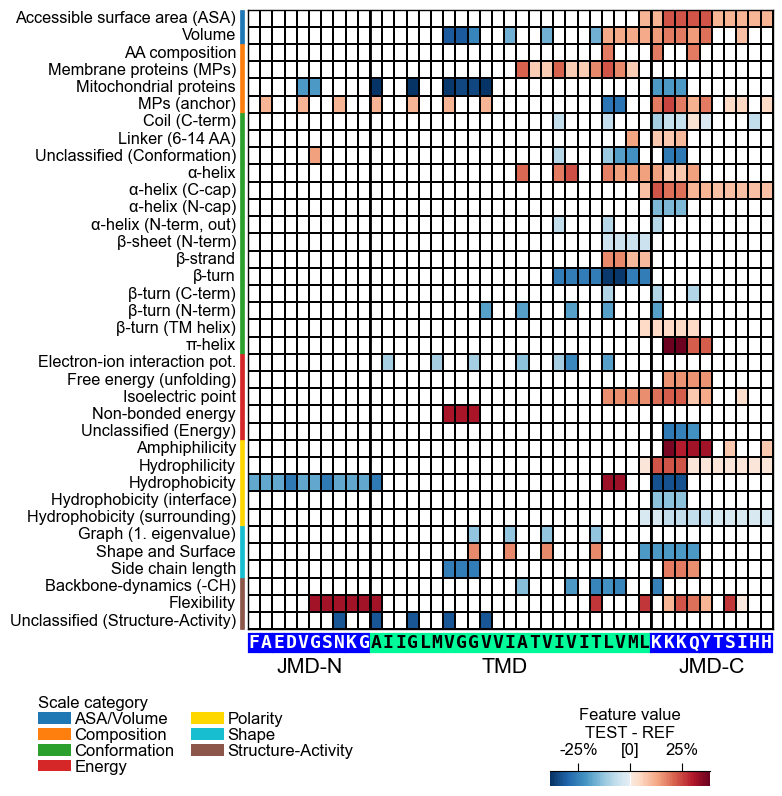

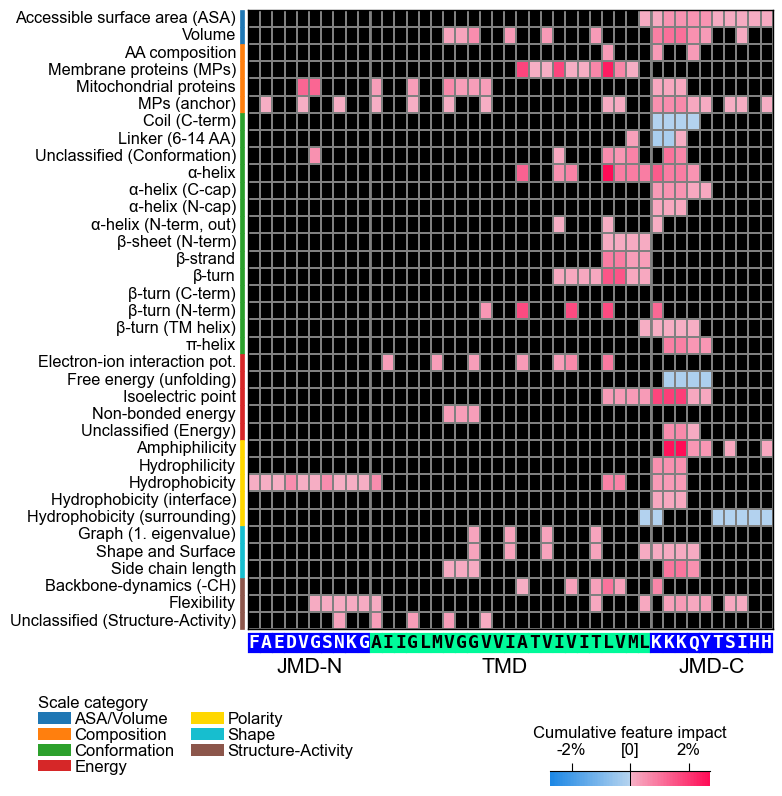

In [369]:
# CPP heatmap (sample level)
aa.plot_settings(font_scale=0.65, weight_bold=False)
cpp_plot.heatmap(df_feat=df_feat, shap_plot=True, col_val="mean_dif_Protein0", **args_seq)
plt.show()

# CPP-SHAP heatmap (sample level)
cpp_plot.heatmap(df_feat=df_feat, shap_plot=True, col_val="feat_impact_Protein0", **args_seq)
plt.show()